In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('kafkaedge/test.csv')

In [3]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

the data mostly in numerical, but almost all of them represent categorical meaning.

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000
Father's qualification,76518.0,23.425076,14.921164,1.00,4.000000,19.000000,37.000000,44.000


# Check data

In [5]:
print(train.isnull().all().any())
print(test.isnull().all().any())

False
False


In [6]:
print(train.isna().all().any())
print(test.isna().all().any())

False
False


In [7]:
print(train.duplicated().any())
print(test.duplicated().any())

False
False


### => This data set is really good. We dont need to modified anything.

# EDA

In [9]:
train.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

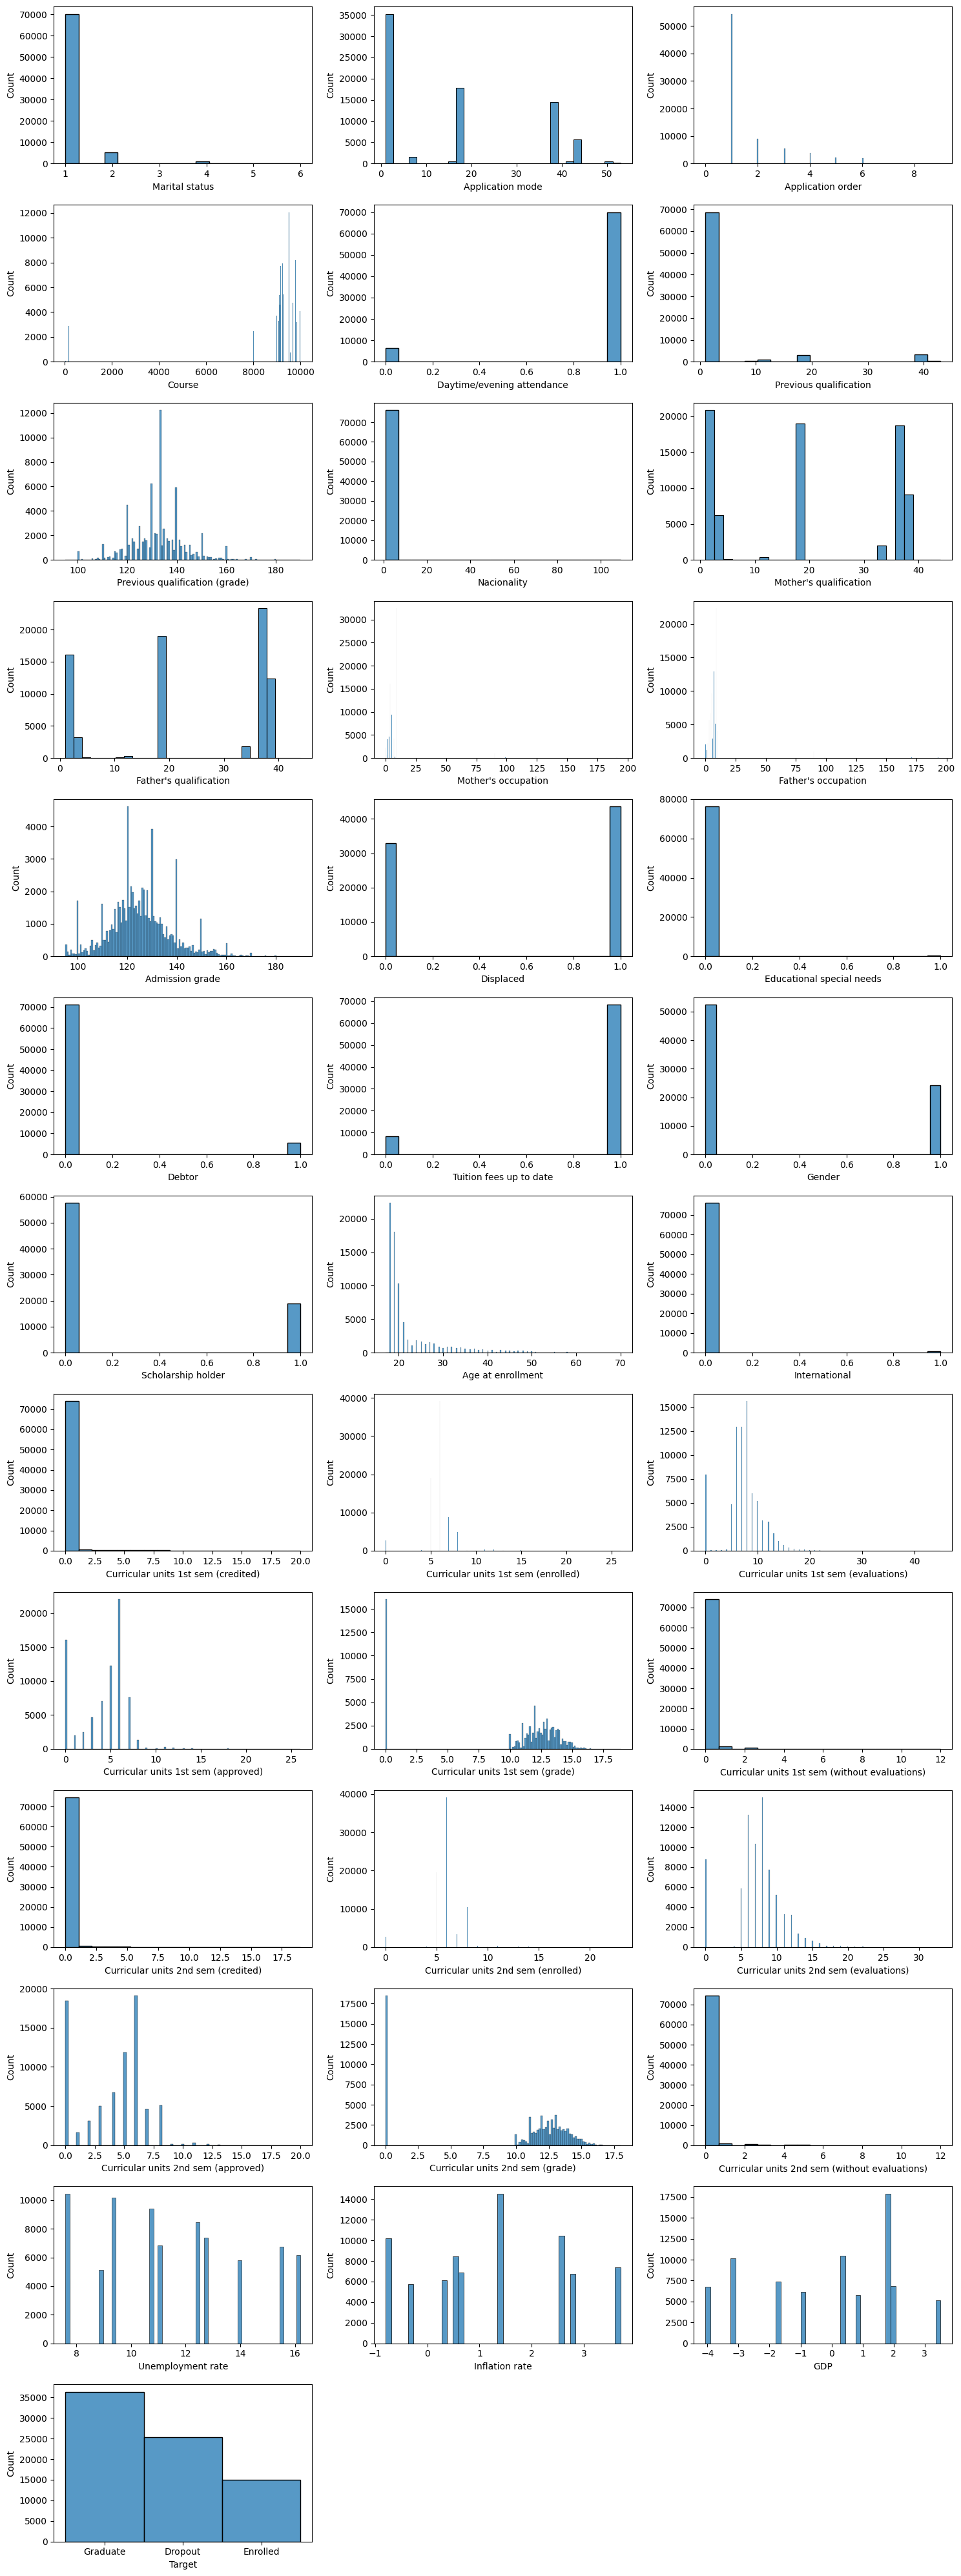

In [10]:

_, axes = plt.subplots(13, 3, figsize=(15, 40))
axes = axes.flatten()

for i, col in enumerate(train.columns):
    ax = axes[i]
    sns.histplot(data=train, x=col, ax=ax)
for i in range(len(train.columns), 39):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# application order: first choice -> last choice
# Previous qualification: schooling (random)
# Previous qualification (grade): Grade of previous qualification



### => this plot just to show the general data shaped, see below for info...

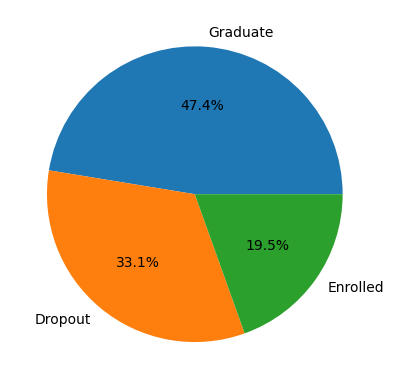

In [11]:
plt.pie(train['Target'].value_counts(), labels=train['Target'].value_counts().index, autopct='%1.1f%%')
plt.show()

### nearly half of the student graduated

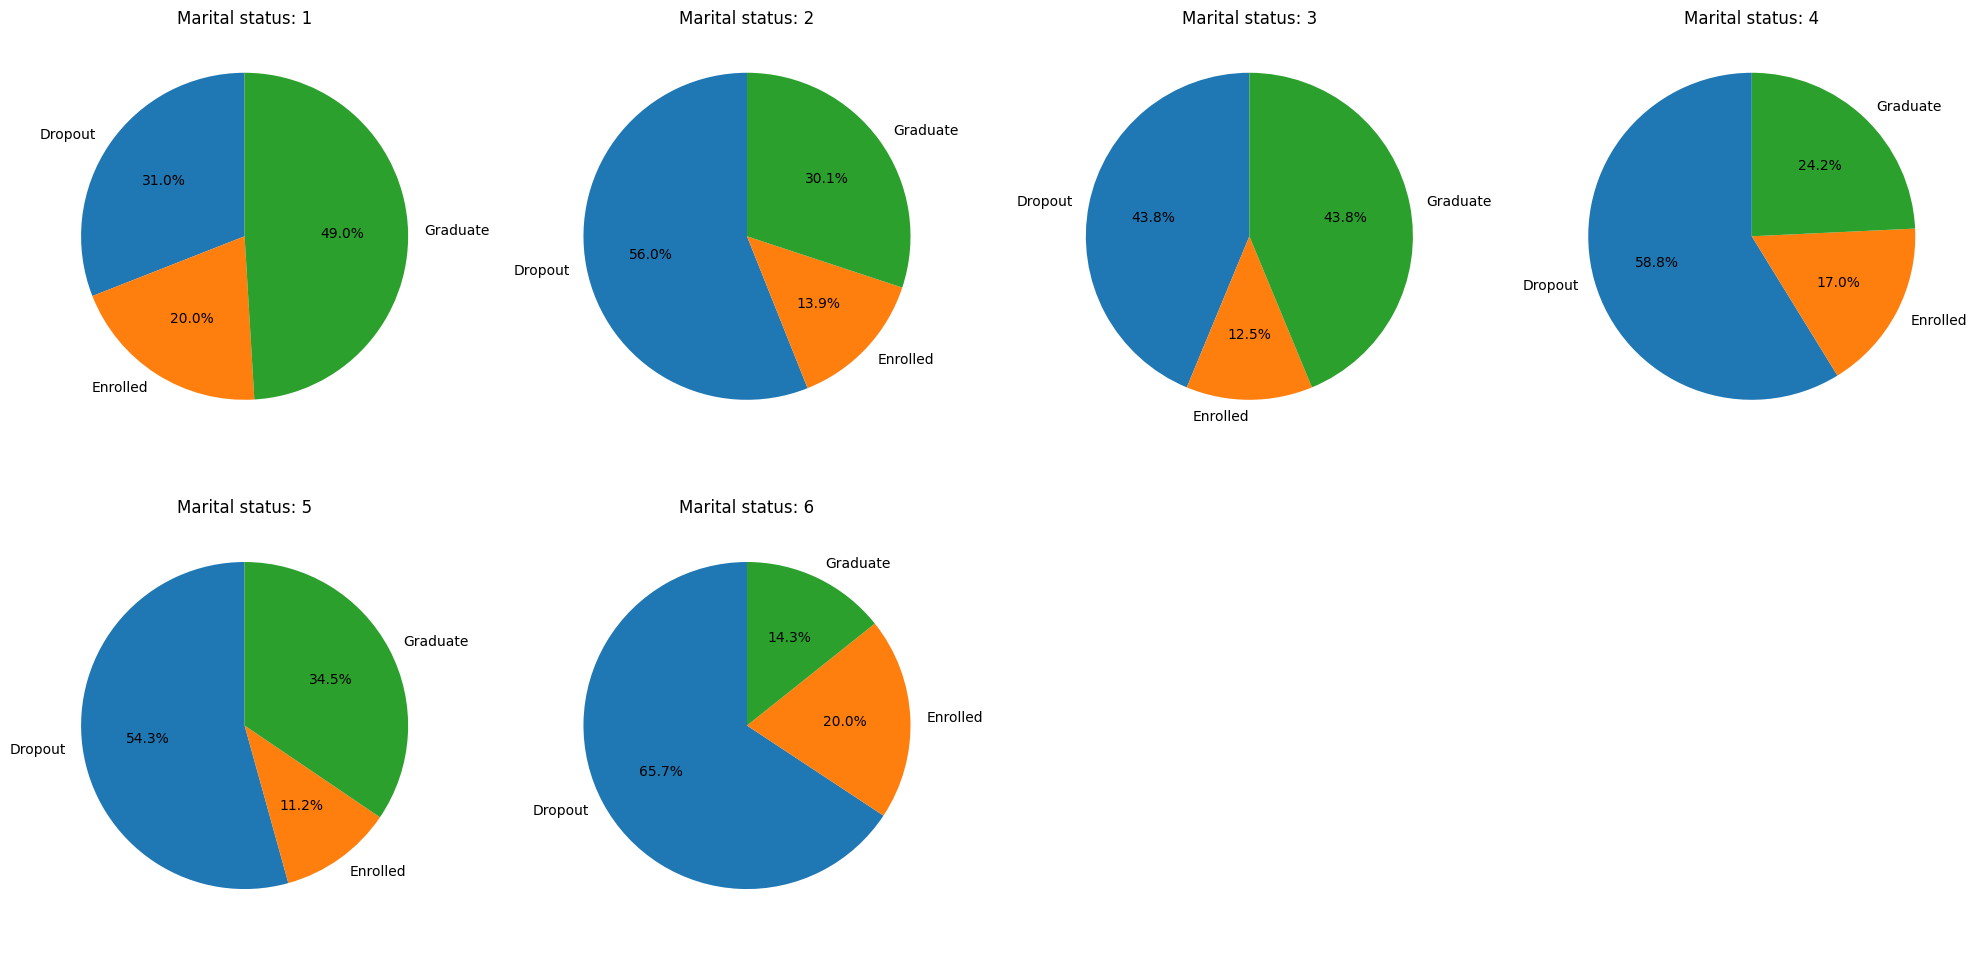

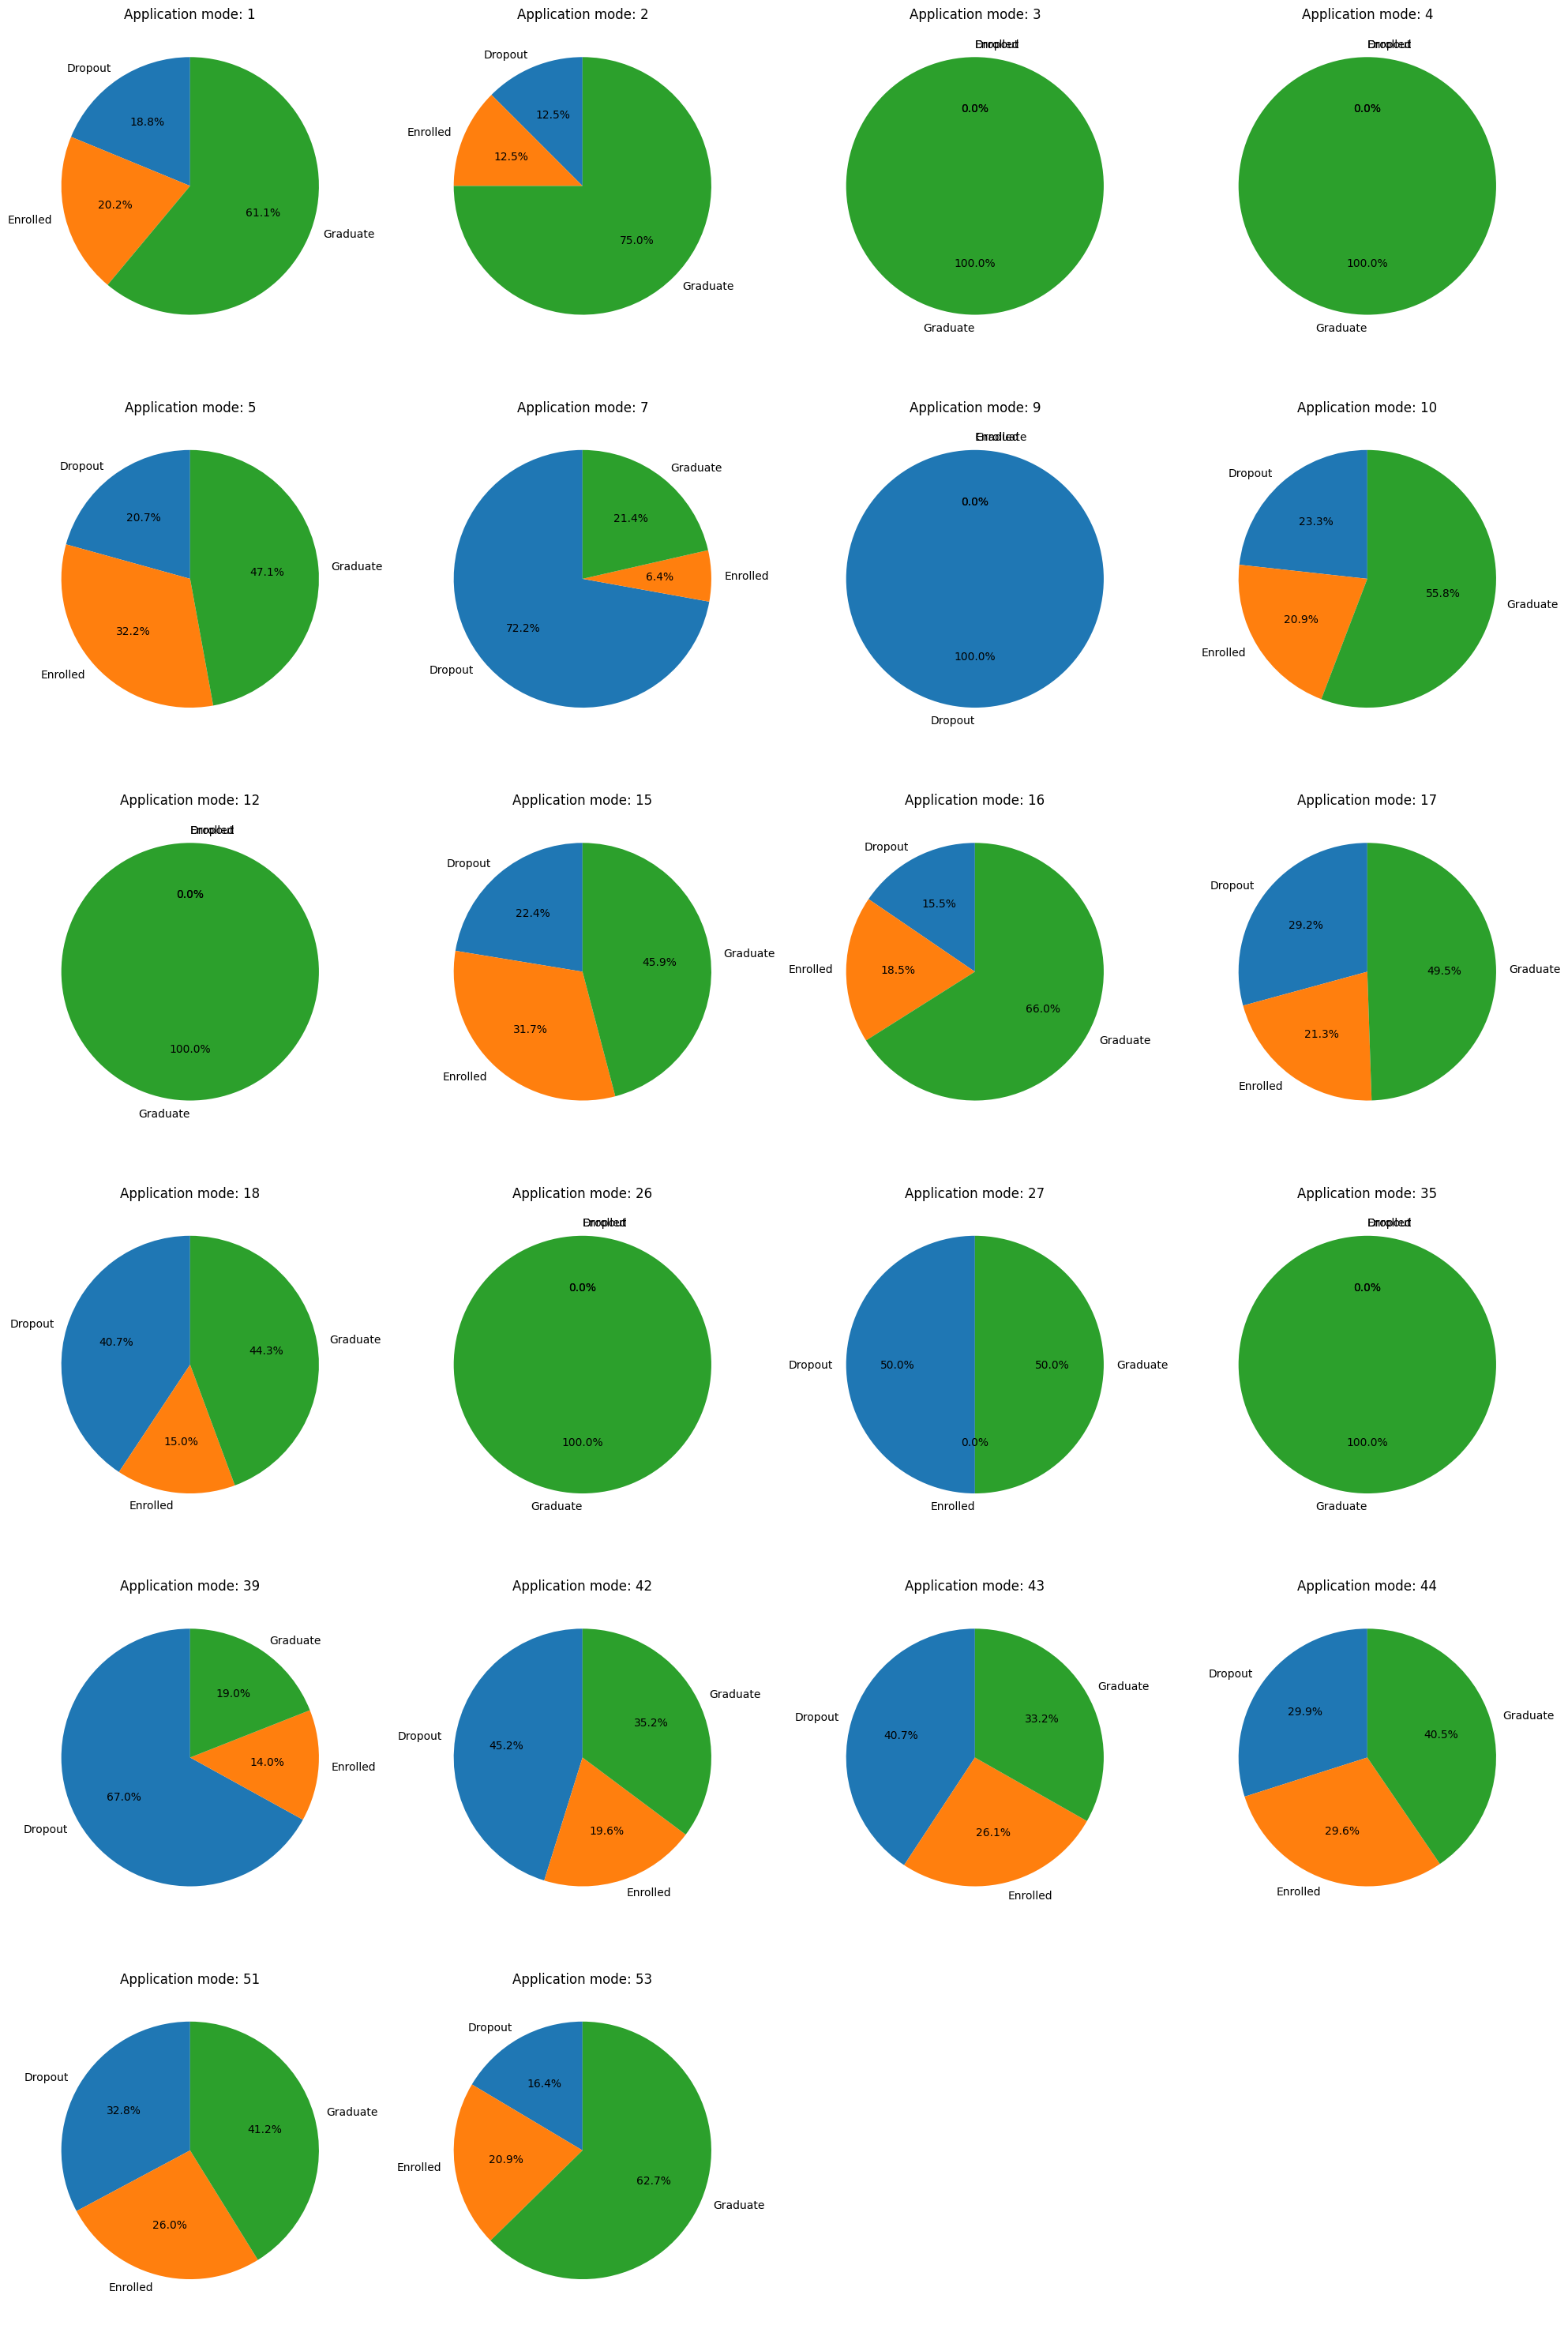

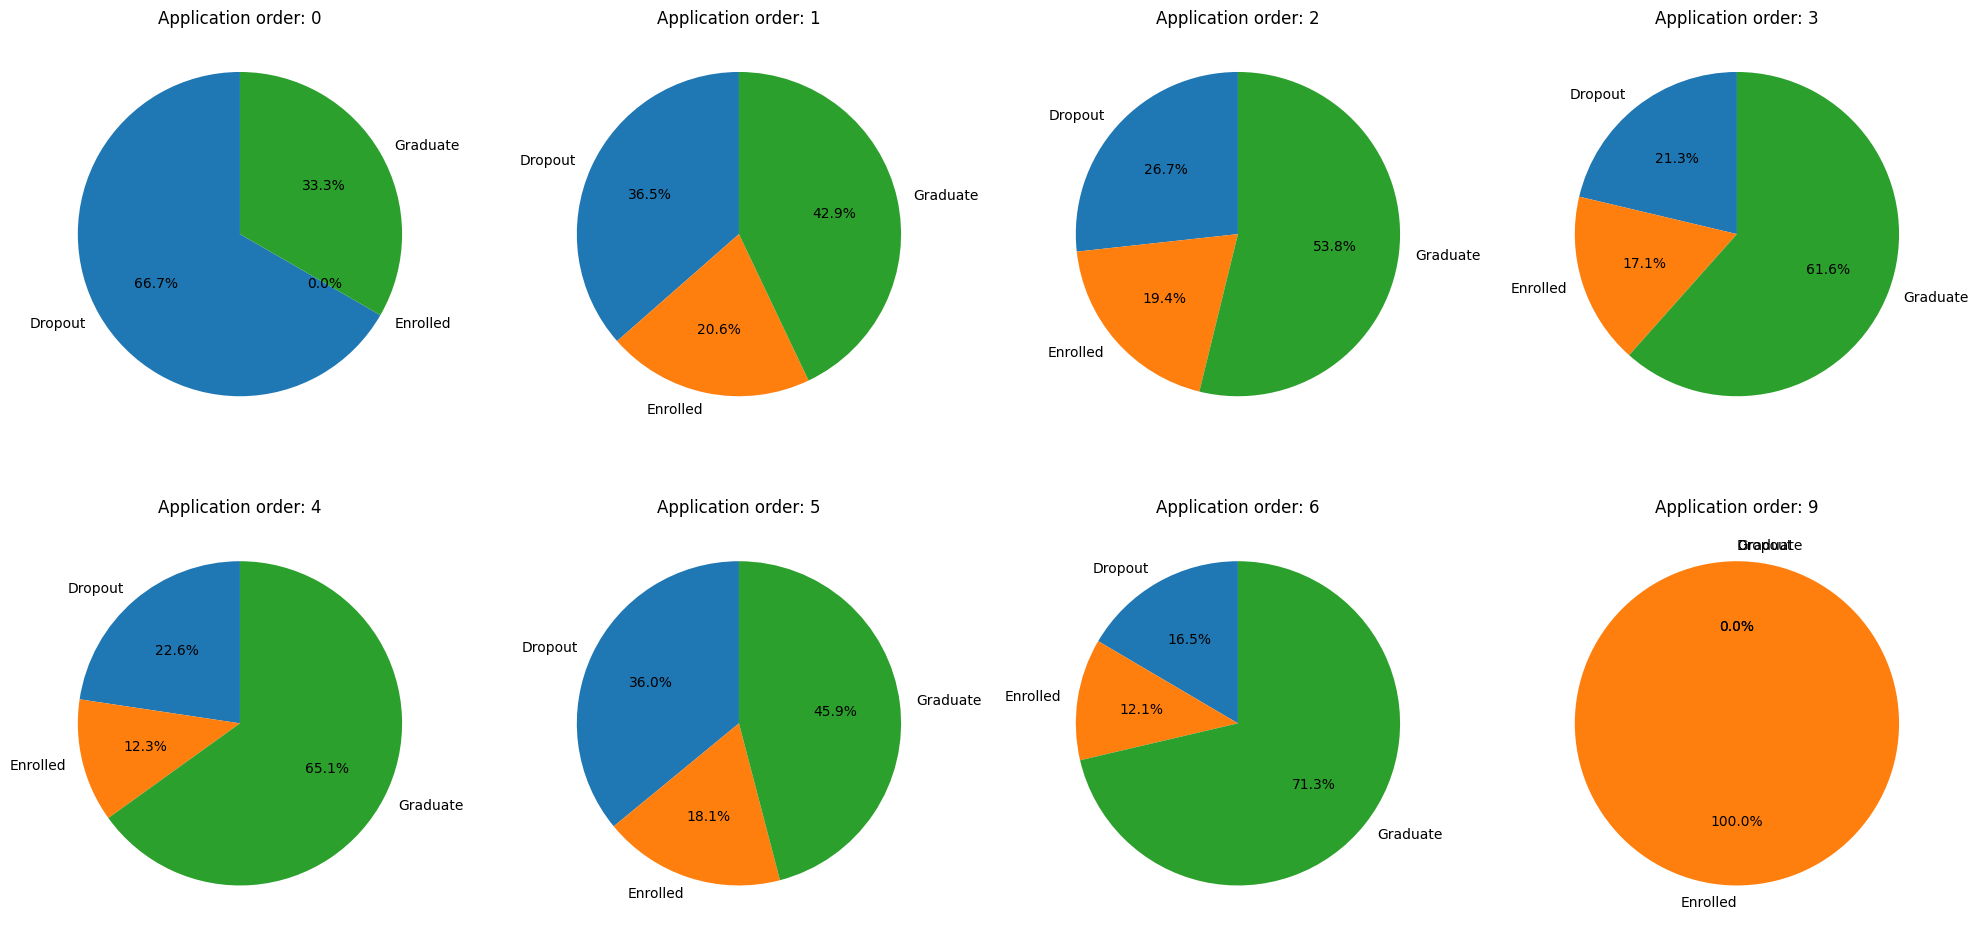

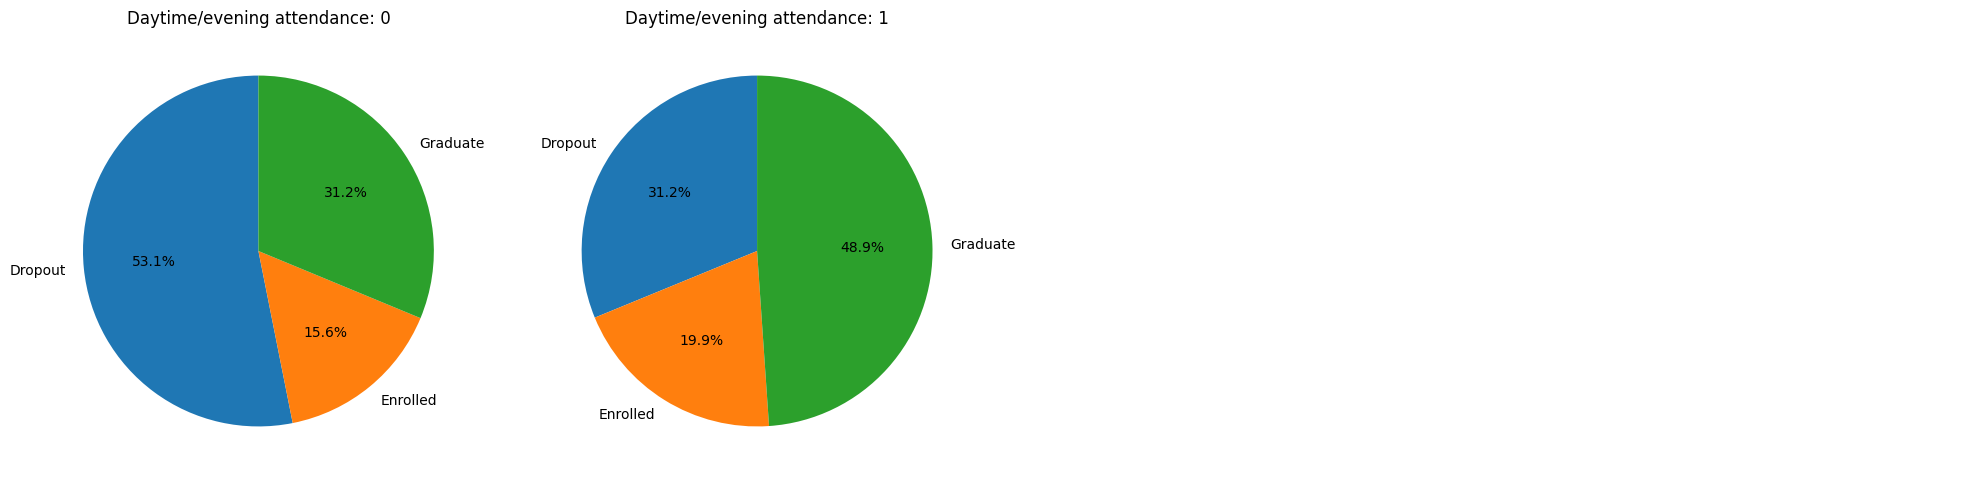

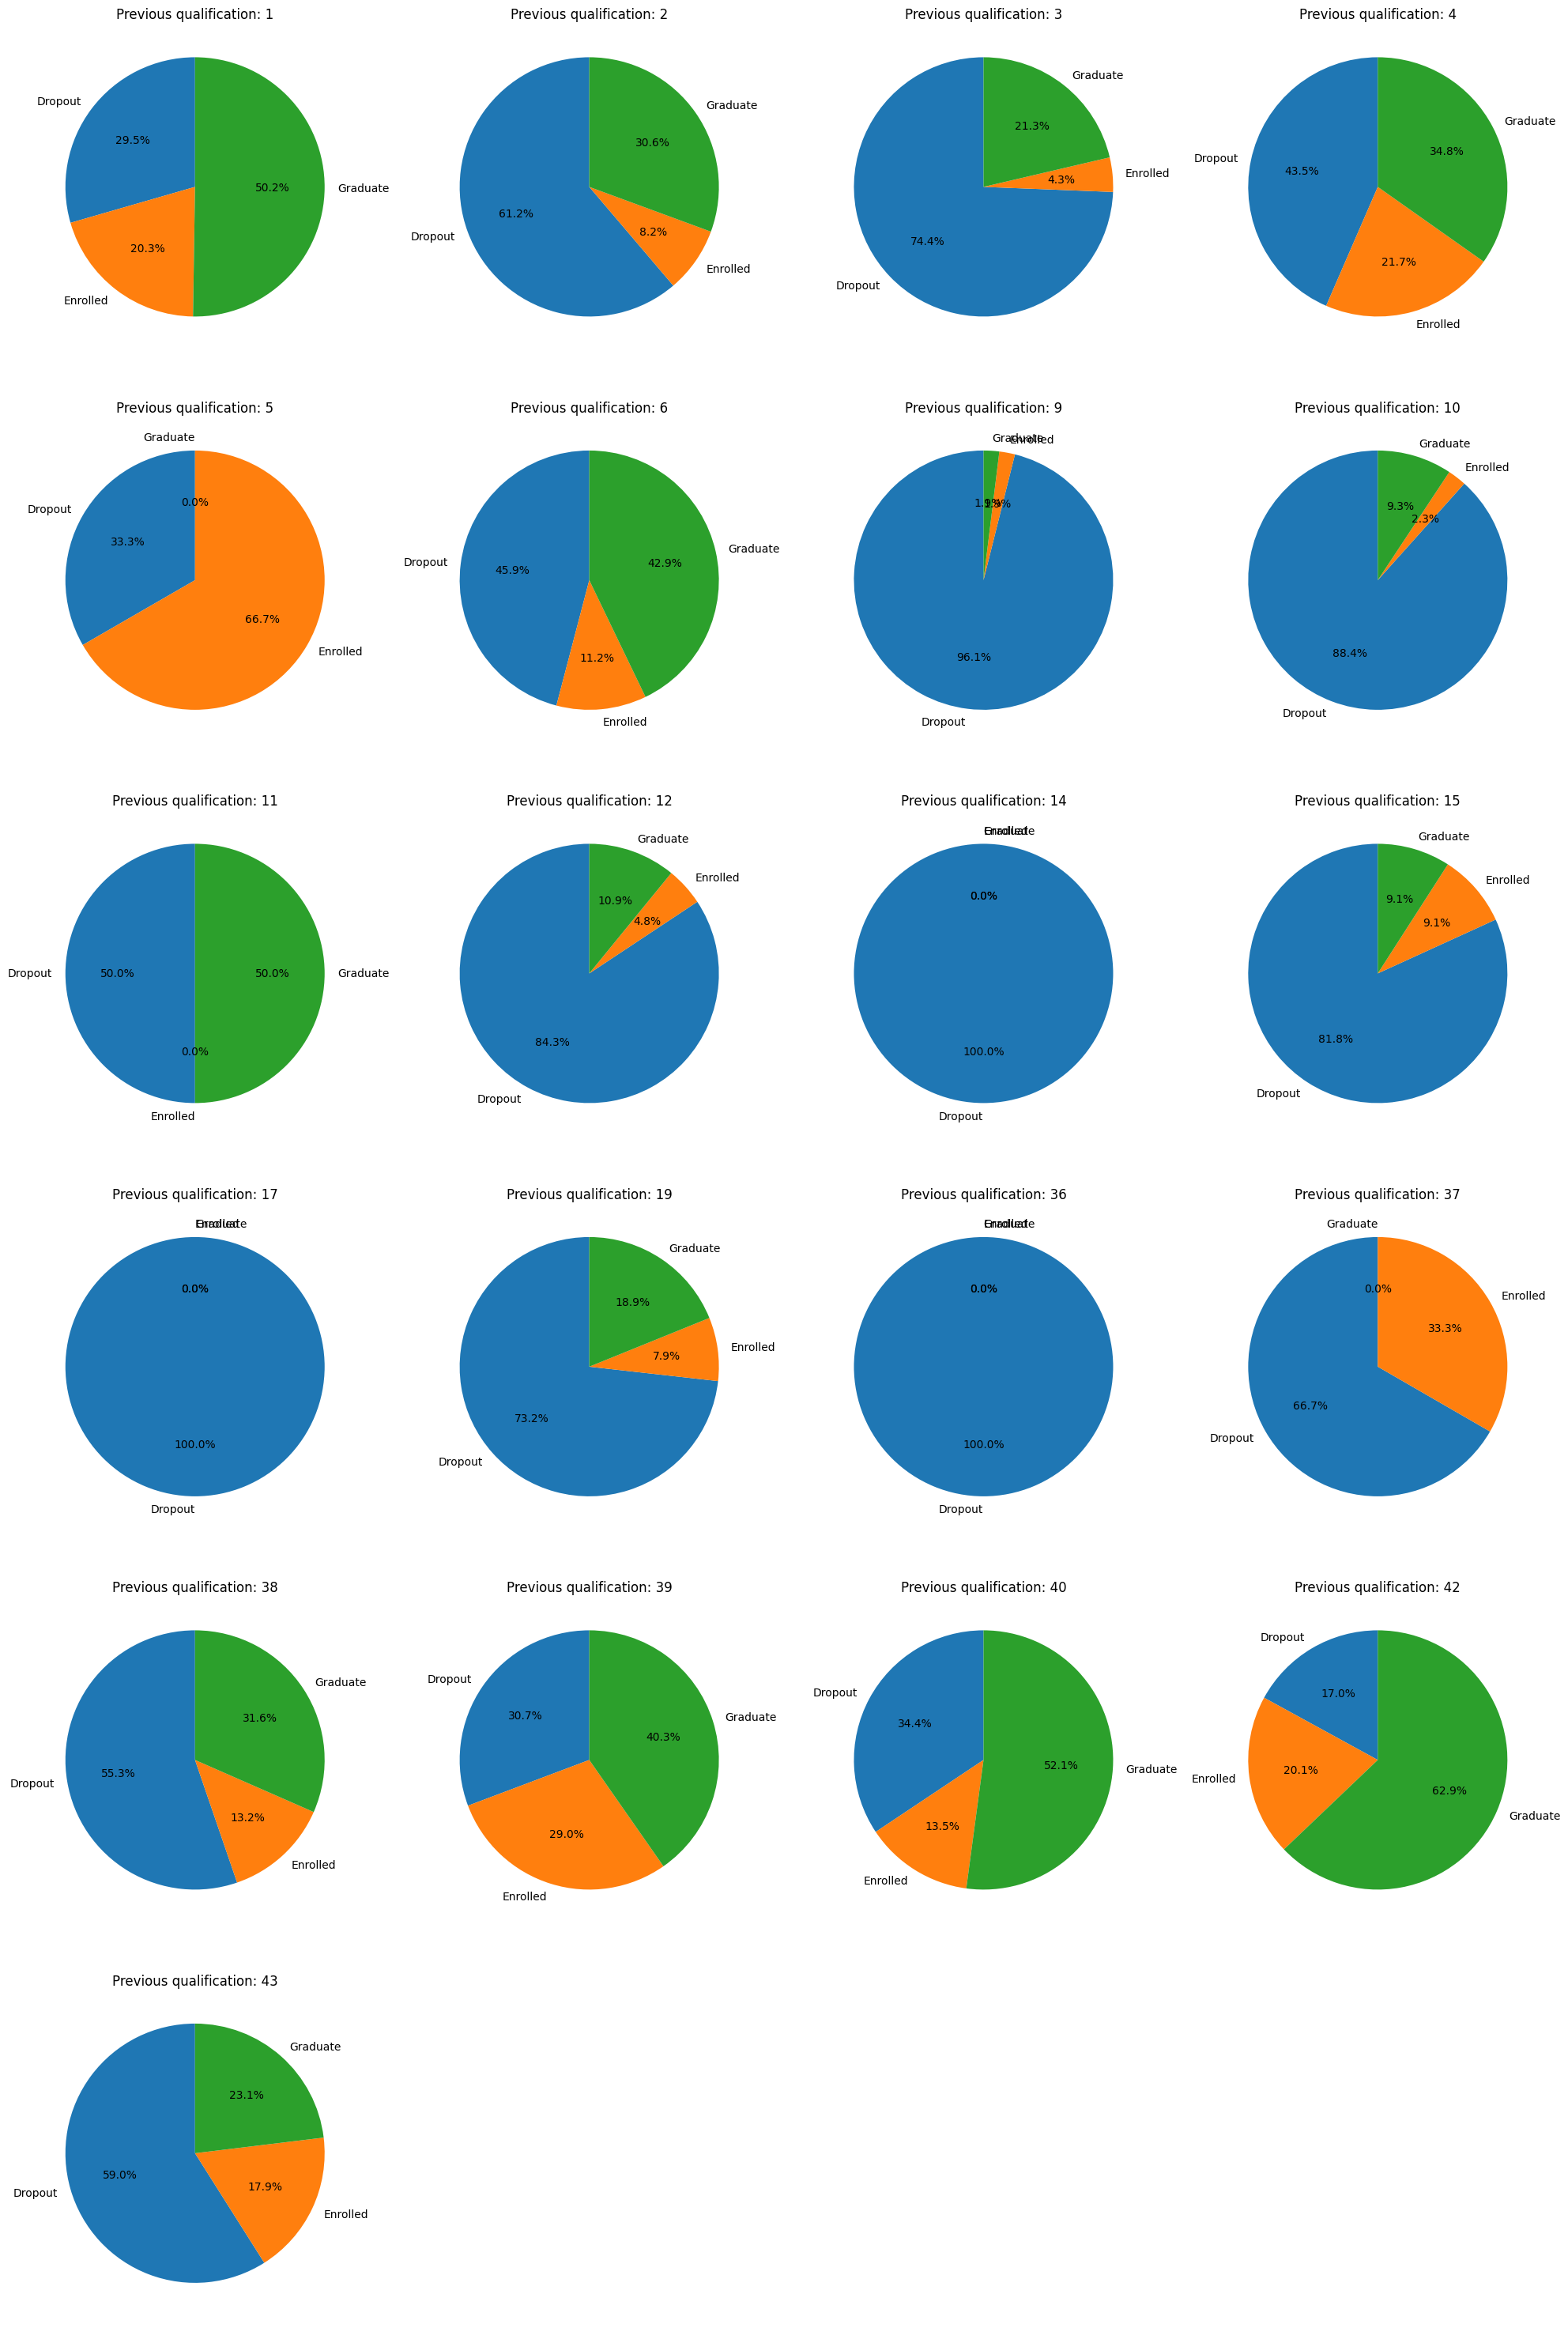

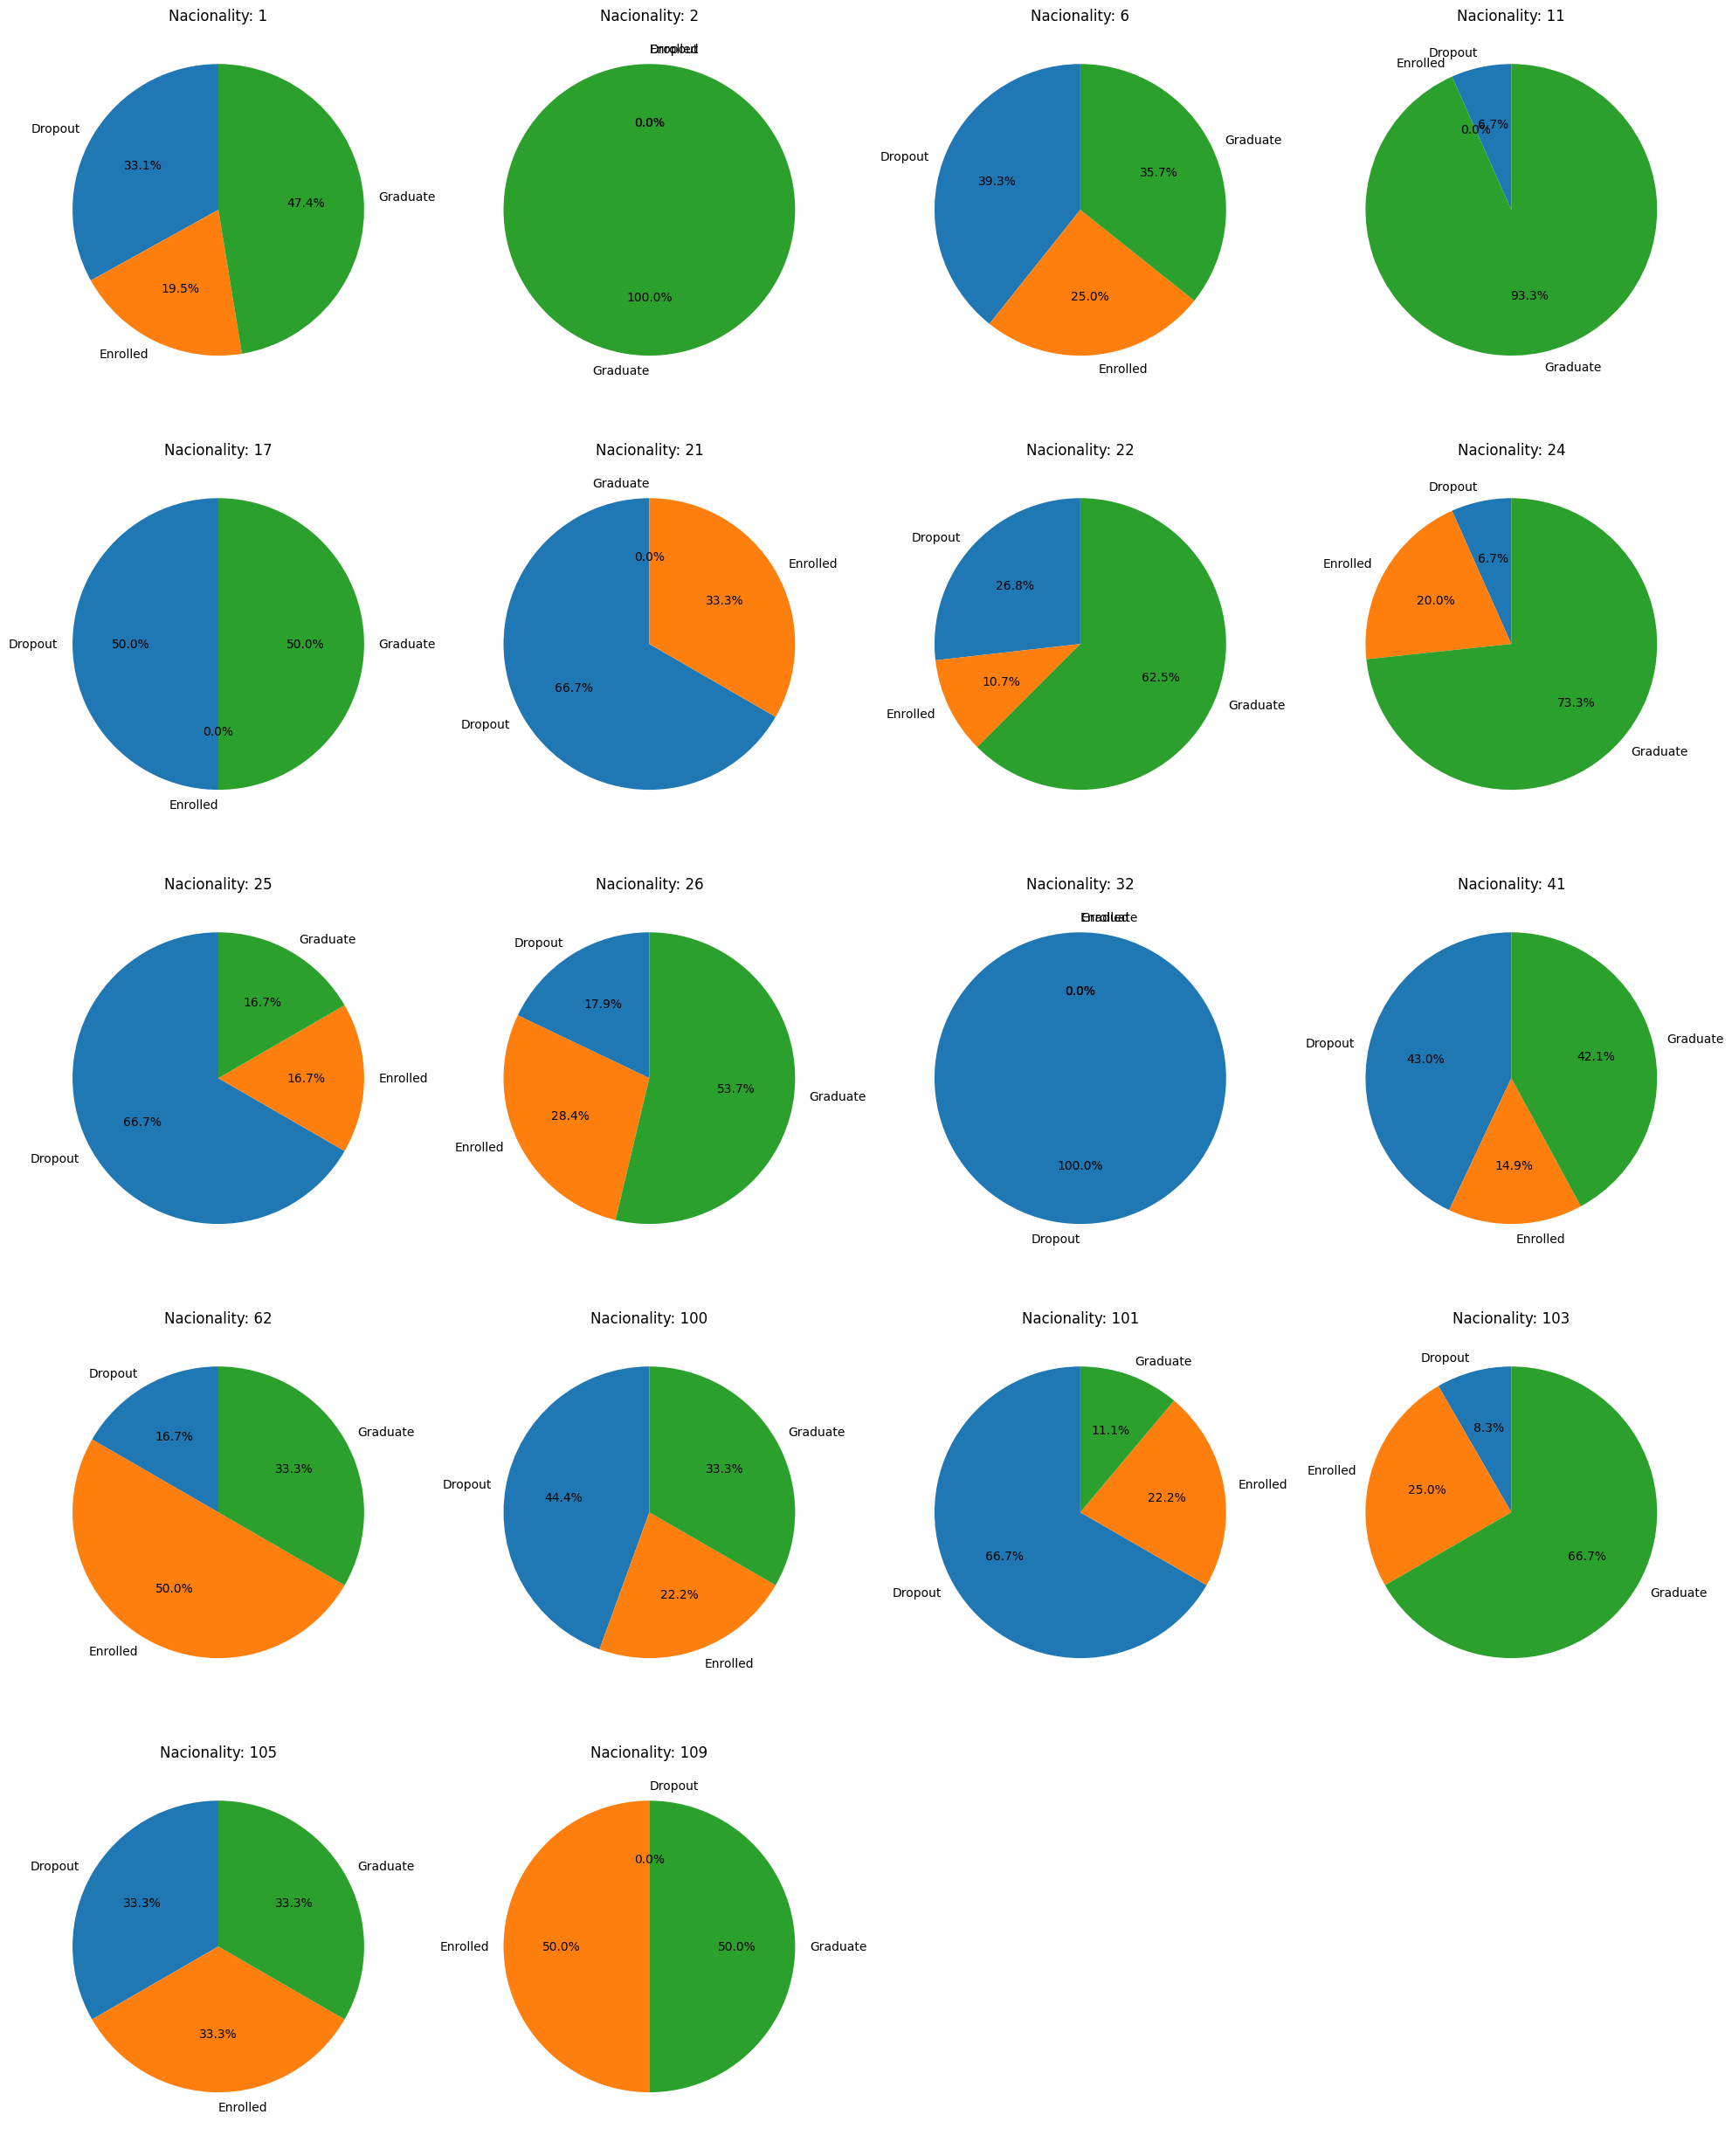

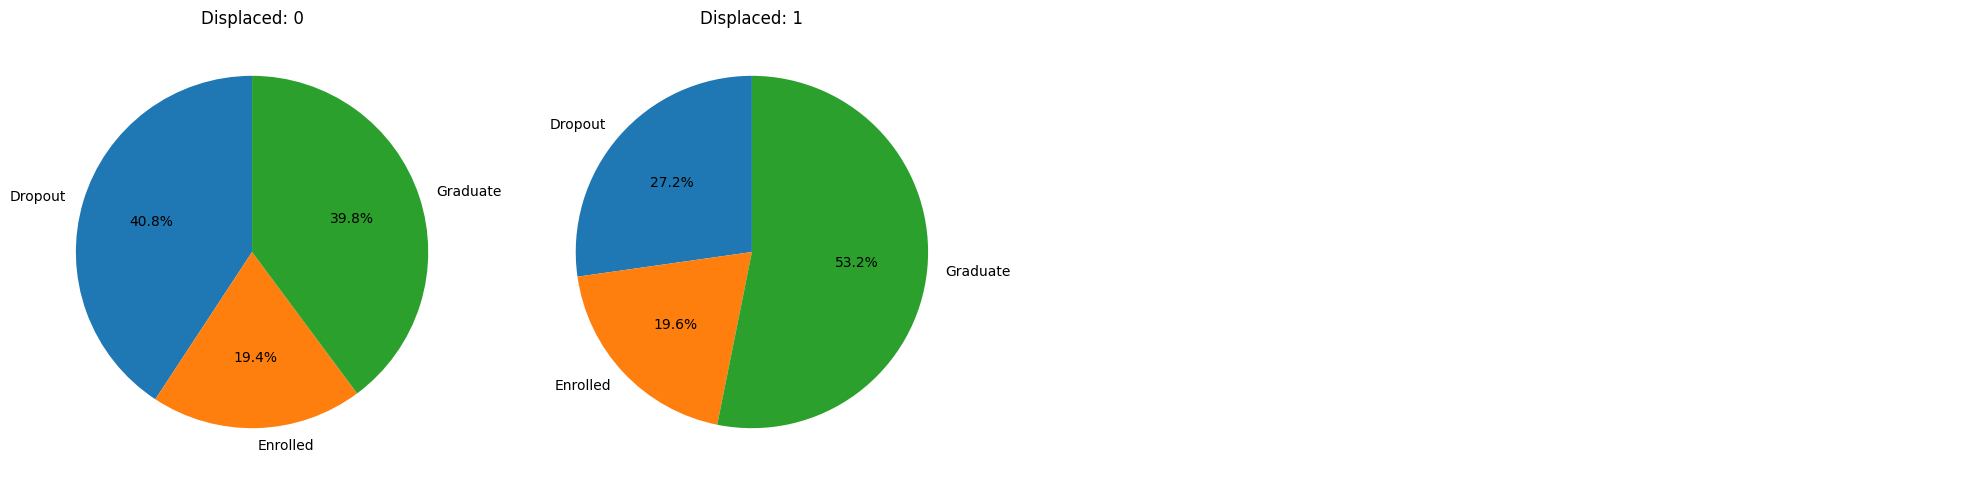

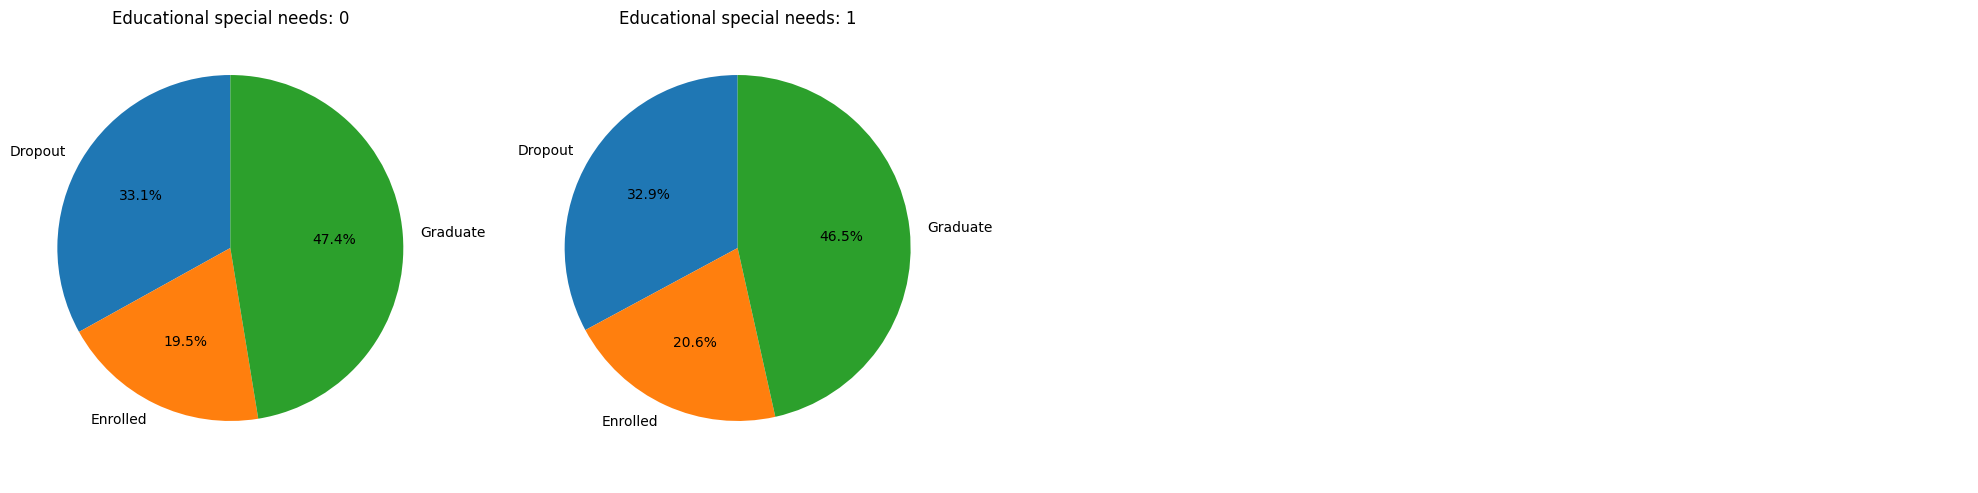

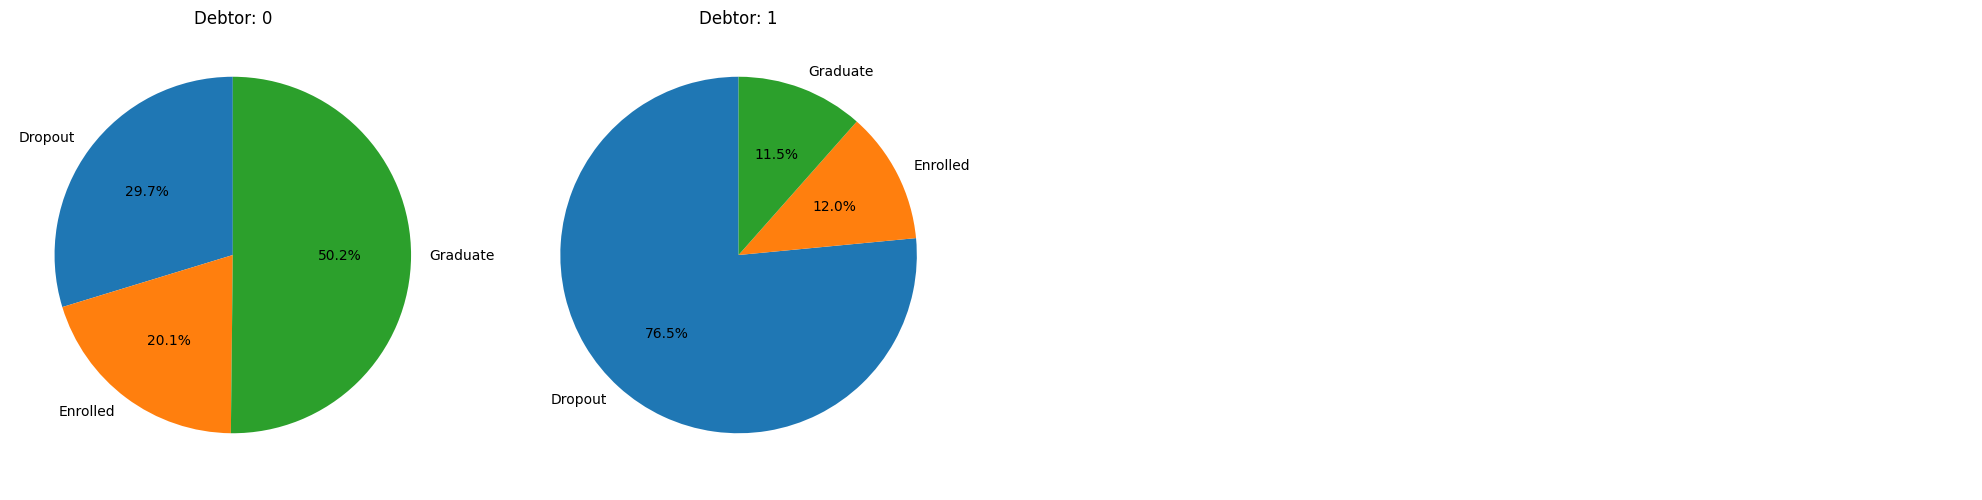

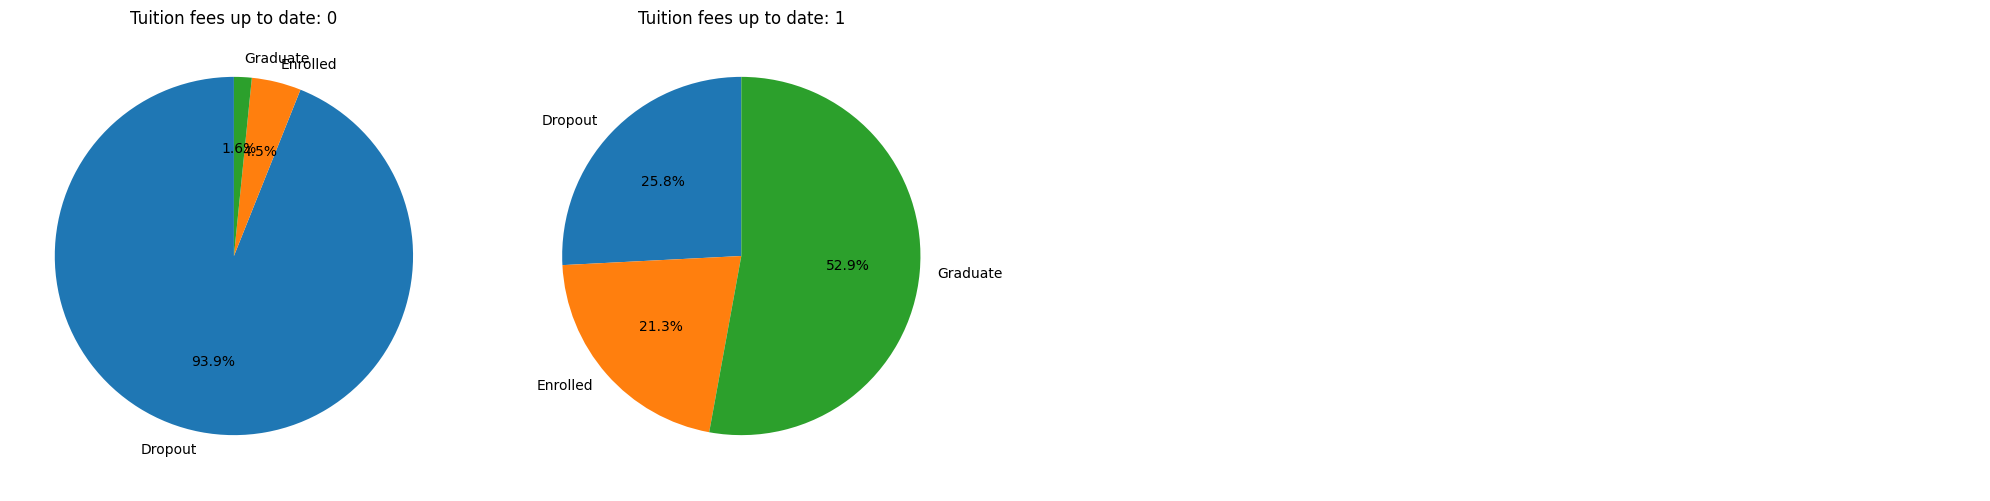

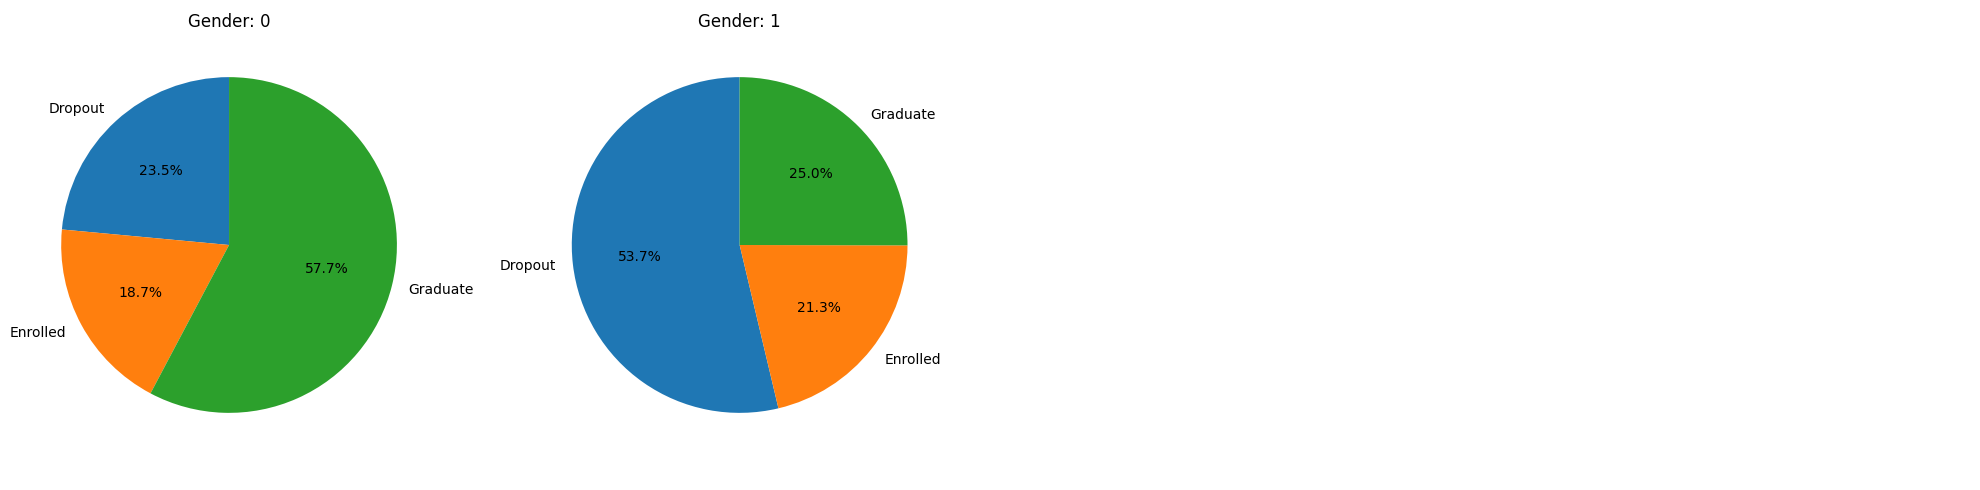

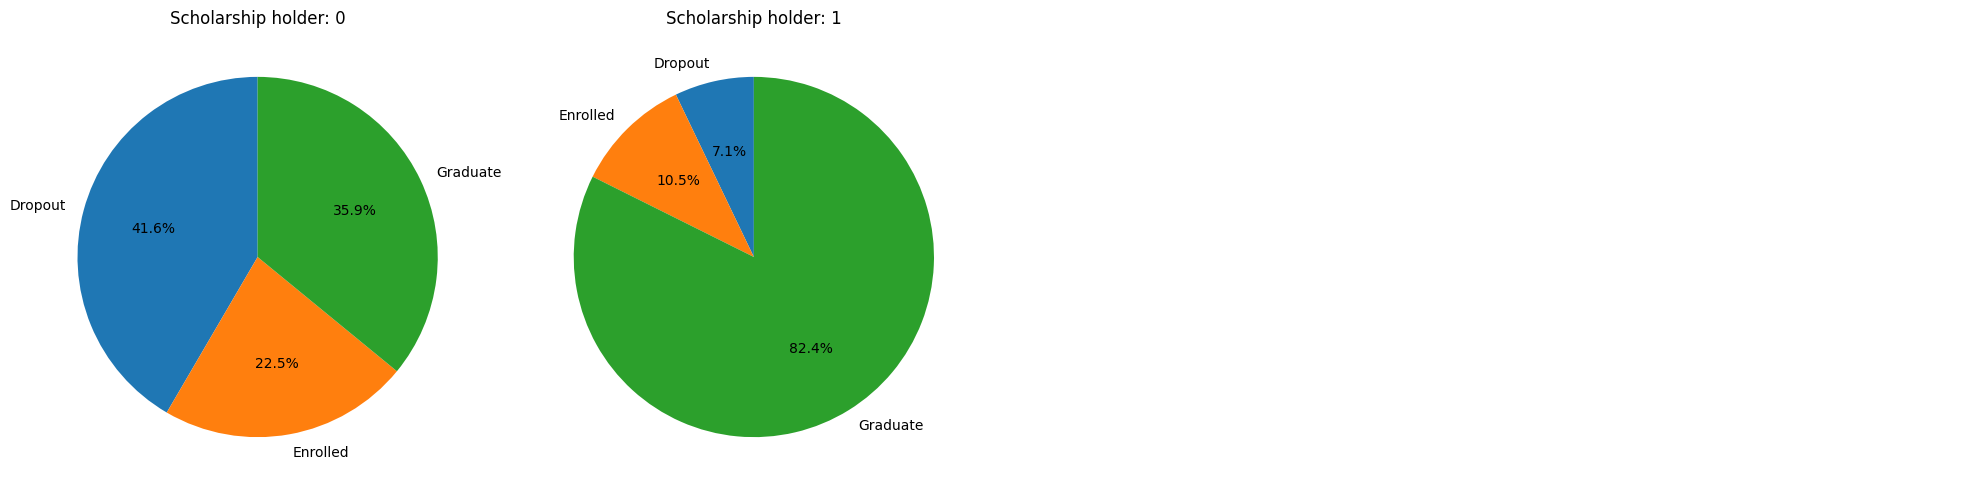

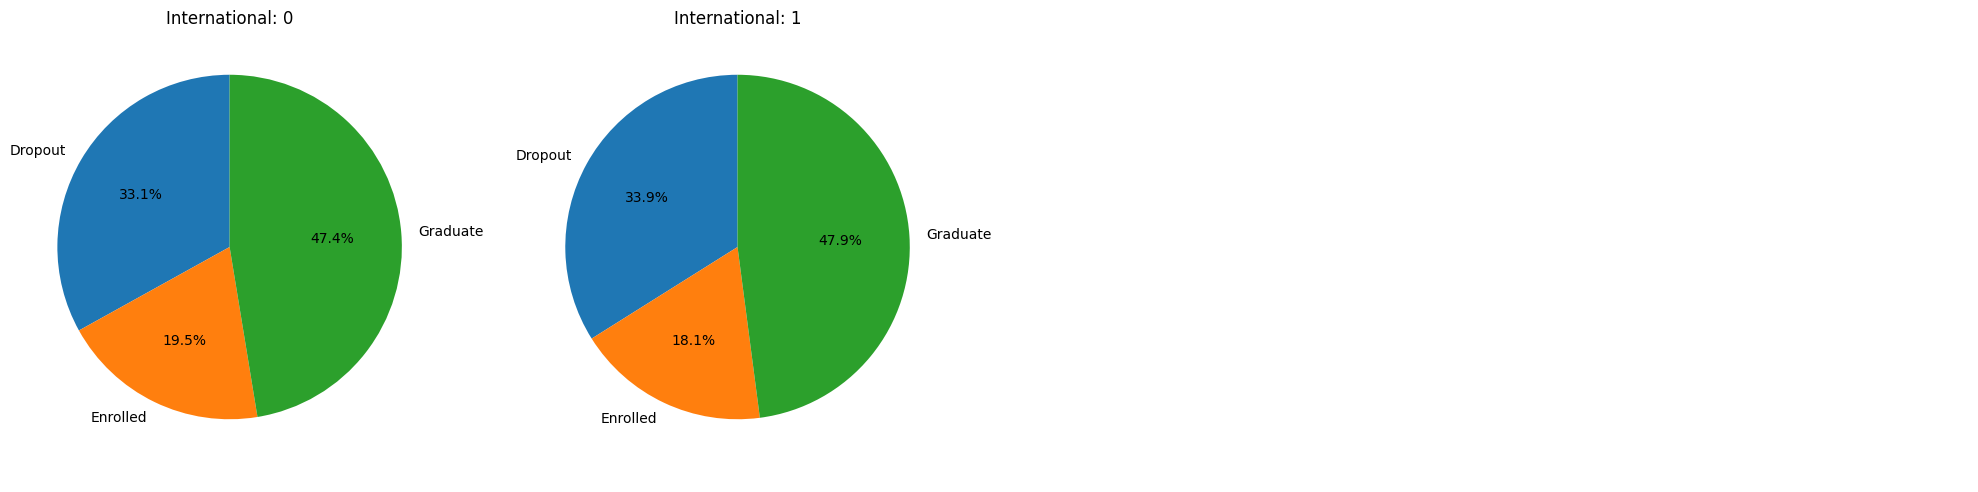

In [12]:
import matplotlib.pyplot as plt

check_list = ['Marital status', 'Application mode', 'Application order', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 
              'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

for c in check_list:
    grouped = train.groupby(c)['Target'].value_counts().unstack().fillna(0)
    num_statuses = len(grouped)

    cols = 4
    rows = (num_statuses + cols - 1) // cols
    _, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten()

    for i, status in enumerate(grouped.index):
        ax = axes[i]
        counts = grouped.loc[status]
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{c}: {status}')

    for i in range(num_statuses, len(axes)): 
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


#### This data is generated from a deeplearning model, alot of infomation is hard to explain.
#### we can see that the amount of female that graduated is alot compared to male.
#### also, the one who has scholarship tend to pass more. 

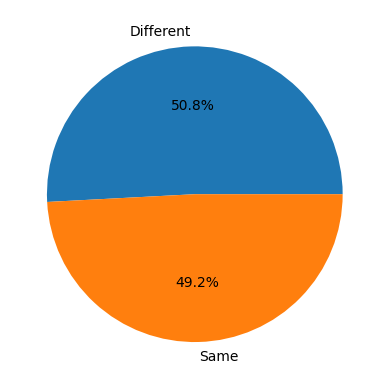

In [13]:
parent_qualification = train["Mother's qualification"] - train["Father's qualification"]
parent_qualification = parent_qualification.apply(lambda x: 0 if x == 0 else 1)
plt.pie(x=parent_qualification.value_counts(), labels=["Different", "Same"], autopct='%1.1f%%')
plt.show()

### half of student's parents has the same education level 

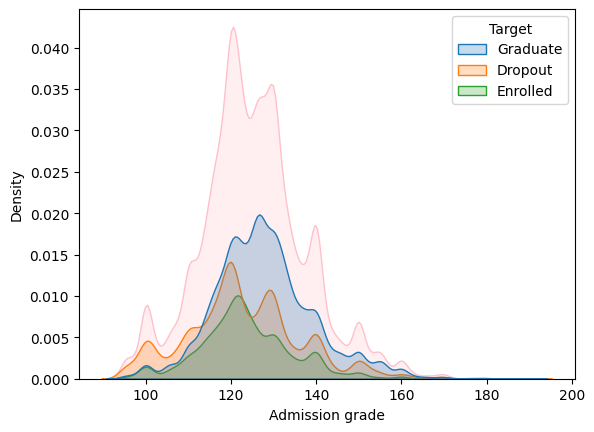

In [14]:
sns.kdeplot(data=train,x = 'Admission grade', fill=True, color='pink' )
sns.kdeplot(data=train,x = 'Admission grade', fill=True, hue='Target', )
plt.show()

#### the average admission point is 120, if look closely we can see the point of graduated students is slightly
#### higher than the dropout group (129>120).
#### => find ways to add feature for this.

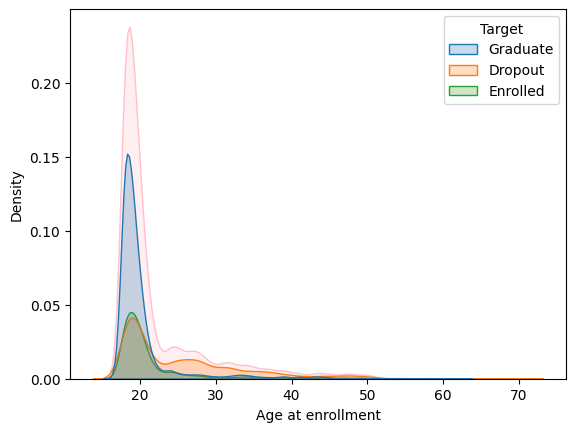

In [15]:
sns.kdeplot(data=train,x = 'Age at enrollment', fill=True, color='pink' )
sns.kdeplot(data=train,x = 'Age at enrollment', fill=True, hue='Target', )
plt.show()

#### most of the student is 18-19 years old.
#### number of student dropout at 22 is higher.
#### => add feature for this.

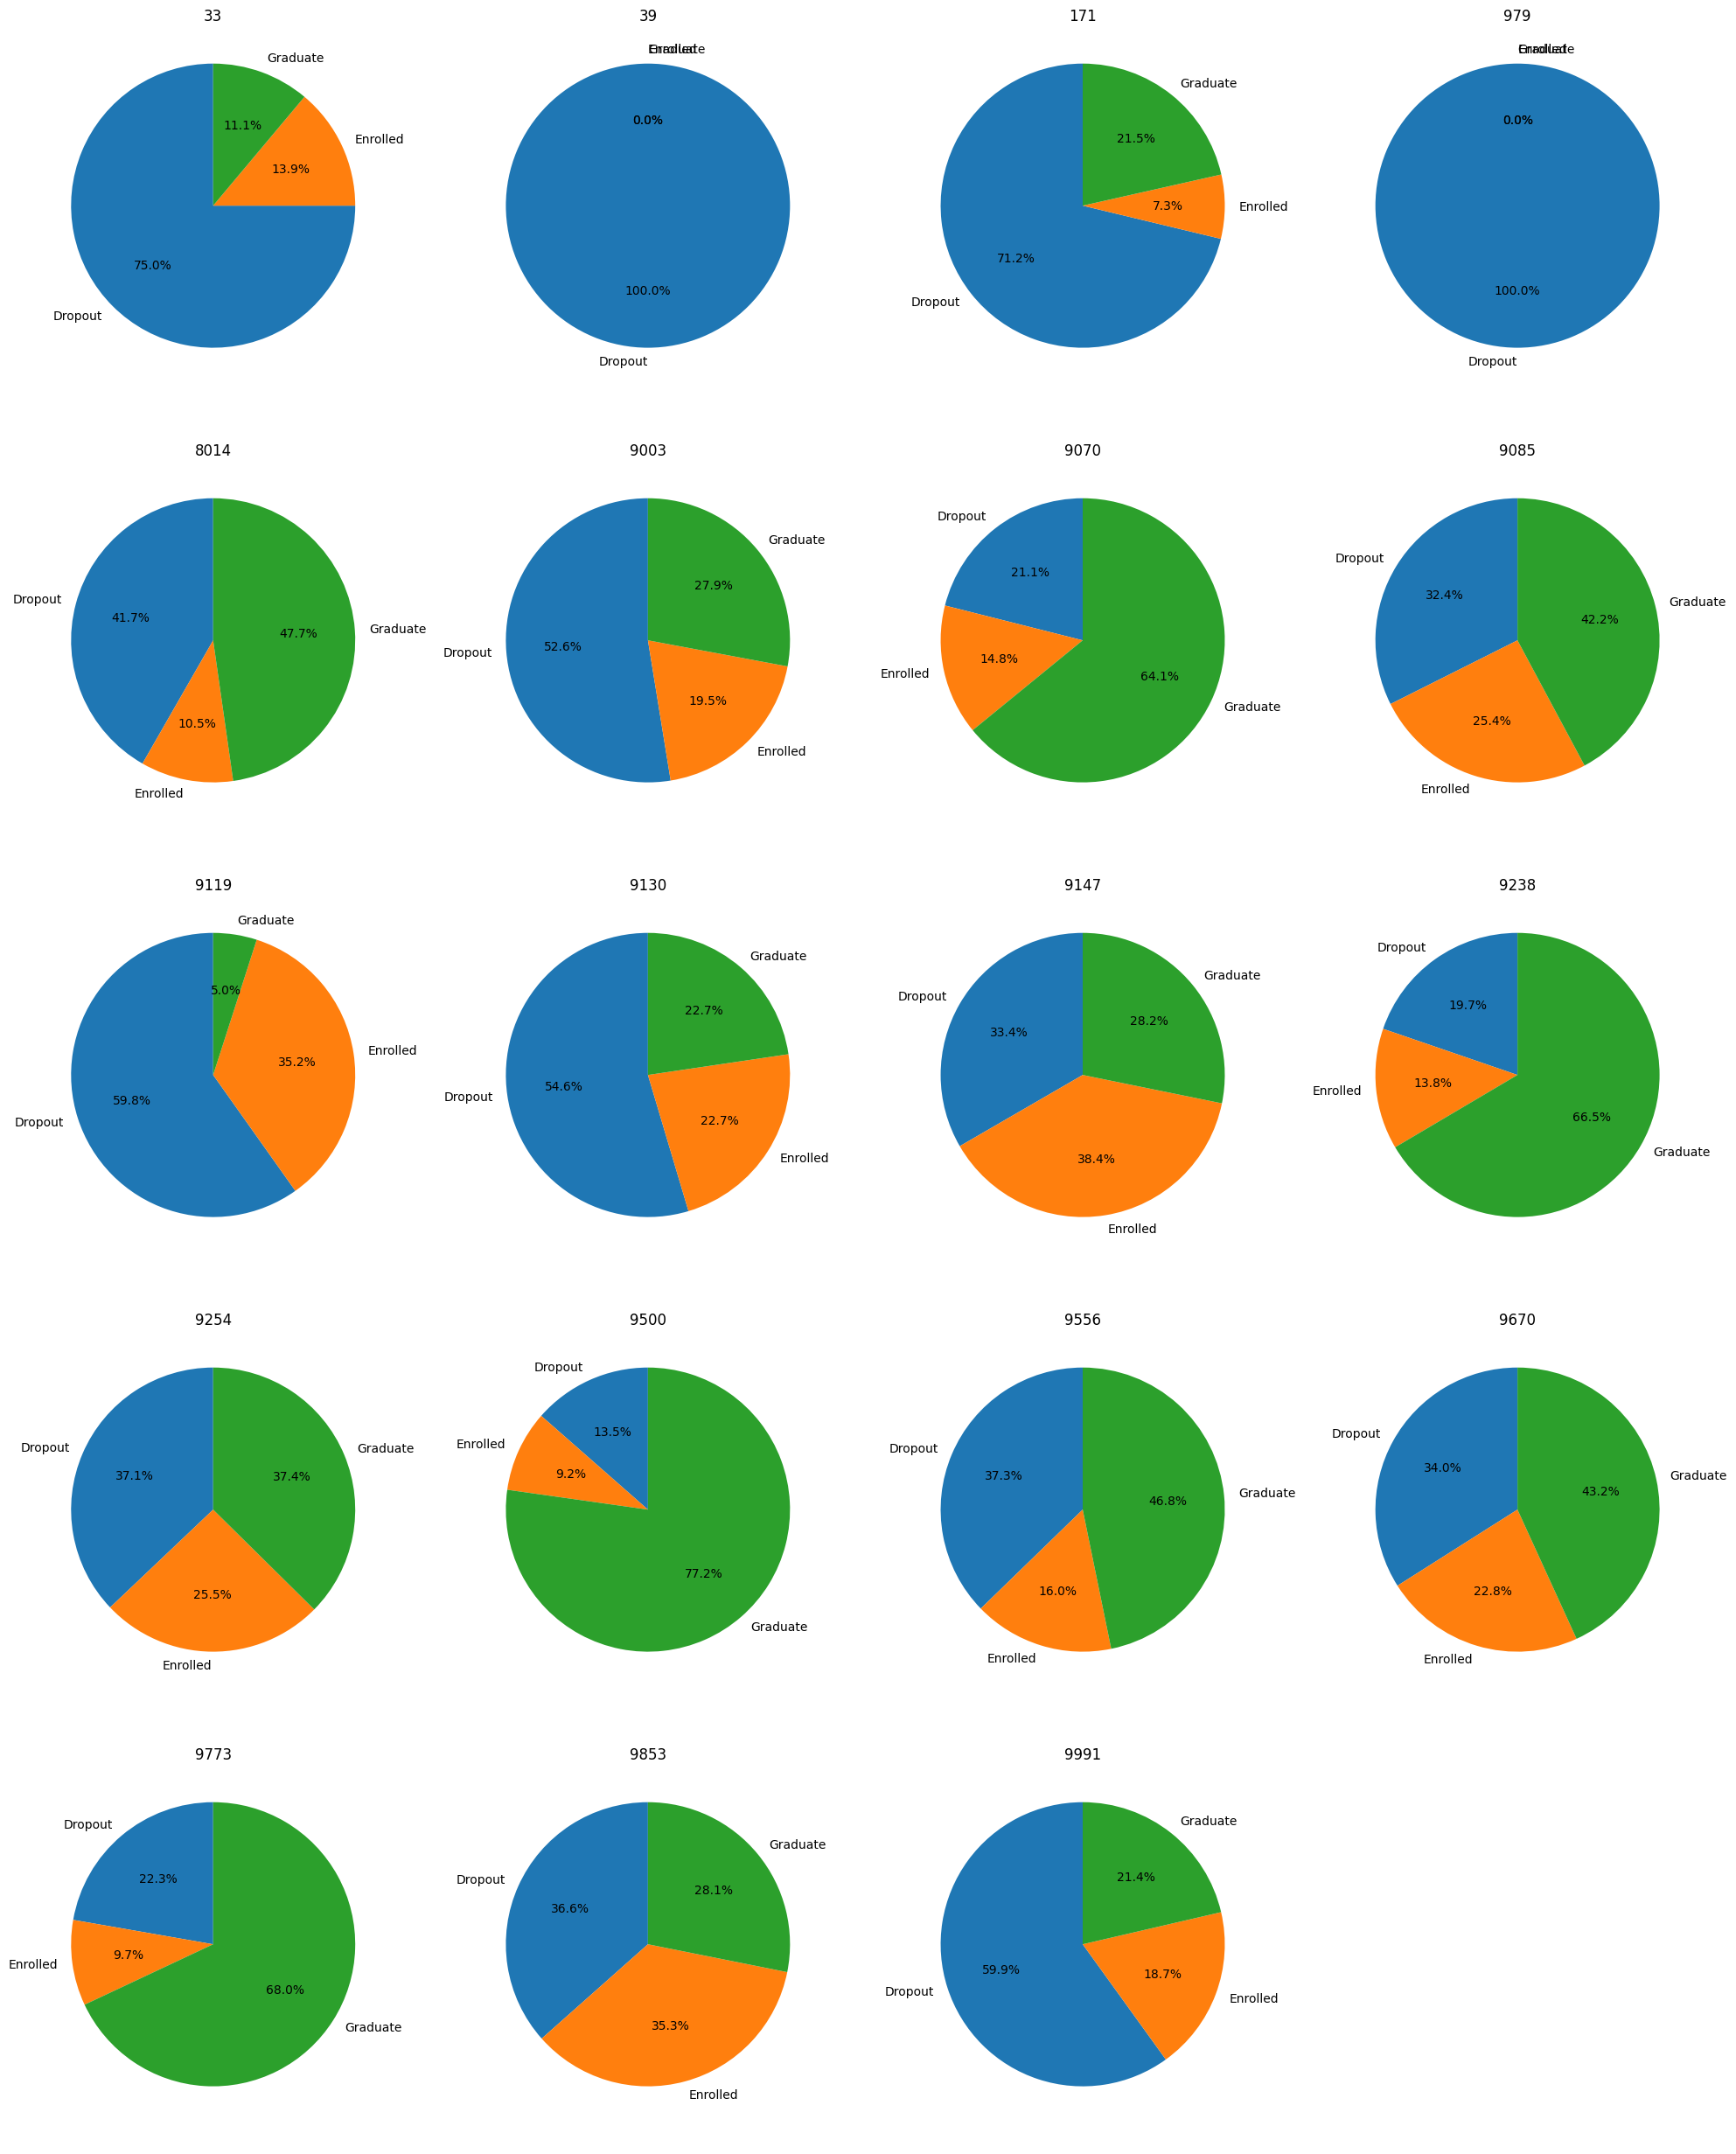

In [17]:
grouped = train.groupby('Course')['Target'].value_counts().unstack().fillna(0)
num_statuses = len(grouped)

cols = 4
rows = (num_statuses + cols - 1) // cols
_, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for i, status in enumerate(grouped.index):
    ax = axes[i]
    counts = grouped.loc[status]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{status}')

for i in range(num_statuses, len(axes)): 
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### we can see that different course has different dropout and graduate.
#### the harder the course => more dropout.